Lab 1 
<br>
 **Assabayev Rauan**

In [0]:
import re, string 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import pandas as pd  # For data handling
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm
from collections import defaultdict
from nltk.corpus import stopwords

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/colab_datasets/BBC-news.csv')
df.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [0]:
STOPWORDS = set(stopwords.words('english'))
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_pre = pd.DataFrame(df.text.apply(lambda x: preprocessing(x)))
df_pre.head(5)

,text
0,tv future hands viewers home theatre systems p...
1,worldcom boss left books alone former worldcom...
2,tigers wary farrell gamble leicester say rushe...
3,yeading face newcastle fa cup premiership side...
4,ocean twelve raids box office ocean twelve cri...


In [0]:
data = [row.split(' ') for row in df_pre['text']]
## Train the genisim word2vec model with our own custom corpus        
model = Word2Vec(data, min_count=1,size= 50,workers=3, window =3, sg = 1)

WARNING - 12:57:04: consider setting layer size to a multiple of 4 for greater performance
INFO - 12:57:04: collecting all words and their counts
INFO - 12:57:04: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:57:04: collected 30088 word types from a corpus of 477834 raw words and 2225 sentences
INFO - 12:57:04: Loading a fresh vocabulary
INFO - 12:57:04: effective_min_count=1 retains 30088 unique words (100% of original 30088, drops 0)
INFO - 12:57:04: effective_min_count=1 leaves 477834 word corpus (100% of original 477834, drops 0)
INFO - 12:57:04: deleting the raw counts dictionary of 30088 items
INFO - 12:57:04: sample=0.001 downsamples 13 most-common words
INFO - 12:57:04: downsampling leaves estimated 467172 word corpus (97.8% of prior 477834)
INFO - 12:57:04: estimated required memory for 30088 words and 50 dimensions: 27079200 bytes
INFO - 12:57:04: resetting layer weights
INFO - 12:57:11: training model with 3 workers on 30088 vocabulary and 50 fe

In [0]:
model.most_similar('america')[:10]

INFO - 12:57:27: precomputing L2-norms of word weight vectors


[('korea', 0.9578529596328735),
 ('barclays', 0.9419835209846497),
 ('pence', 0.9371678829193115),
 ('north', 0.9369767308235168),
 ('steel', 0.9367641806602478),
 ('carmaker', 0.9354779124259949),
 ('indian', 0.9350957870483398),
 ('swiss', 0.9327080249786377),
 ('air', 0.9322549104690552),
 ('hong', 0.9299468994140625)]

In [0]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

  
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt

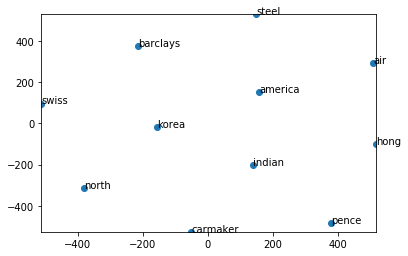

In [0]:
display_closestwords_tsnescatterplot(model,'america',50)